<a href="https://colab.research.google.com/github/Tamrika/Deep-Learning/blob/main/Forecast_Covid19_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series forecasting with RNNs 

### Problem: 
Train a deep learning model to forecast daily confirmed Covid 19 casesfor each state 7 days into the future

Gathering daily count of Covid 19 confirmed cases for each State in the US reported by John Hopkins University Center for System Science and Engineering


## Let's import the libraries we need and download the data into colab session.

In [ ]:
!pip install pandas
import os
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

In [ ]:
#Getting the Data
# downloading the files from dropbox
!wget --no-check-certificate  "https://uofi.box.com/shared/static/wjwxj10k2f6u8bjohsl17tmfmaoo7zhg.csv" -O covid.csv
df = pd.read_csv('/content/covid.csv')


--2021-04-17 19:50:19--  https://uofi.box.com/shared/static/wjwxj10k2f6u8bjohsl17tmfmaoo7zhg.csv
Resolving uofi.box.com (uofi.box.com)... 107.152.24.197
Connecting to uofi.box.com (uofi.box.com)|107.152.24.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/wjwxj10k2f6u8bjohsl17tmfmaoo7zhg.csv [following]
--2021-04-17 19:50:19--  https://uofi.box.com/public/static/wjwxj10k2f6u8bjohsl17tmfmaoo7zhg.csv
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/wjwxj10k2f6u8bjohsl17tmfmaoo7zhg.csv [following]
--2021-04-17 19:50:19--  https://uofi.app.box.com/public/static/wjwxj10k2f6u8bjohsl17tmfmaoo7zhg.csv
Resolving uofi.app.box.com (uofi.app.box.com)... 107.152.24.201
Connecting to uofi.app.box.com (uofi.app.box.com)|107.152.24.201|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcl

## Inspecting and Cleaning data (+8pt)
1-Convert the “Last_Update” column to datetime and Use sort_values to sort the dataframe by“Last_update”

2-    Use pandas.DataFrame.describe to get a summary statistics of data. Are there any invalidentries in the data? If so, use commonsense to replace the invalid entries.

3-    Remove the rows where the Province_State is “Recovered”, “American_Samoa”, “DiamondPrincess” or “Grand Princess” (These Province_states have mostly NA or zeros for confirmedcases)

4-Count and print the number of rows for each remaining Province_State. Most States should nowhave 351 data points

5-Drop the following columns. These variables are the same for each State."Lat","Long_","FIPS","Country_Region","UID","ISO3"

6-Drop the following columns. These variables are either redundant or missing too many records."Total_Test_Results","Case_Fatality_Ratio","Hospitalization_Rate","People_Hospitalized"


7-Print the number of missing values in the remaining columns.  Use fillna function to fill themissing values with a value that does not naturally occur in the data ( such as -1).

8-    The “Last_Update” column is useful but not in the string format. Convert this column to“month”,  “day of the week” and “day of the month” using pandas.series.dt.month,pandas.series.dt.dayofweek and  pandas.series.dt.day

### Converted the “Last_Update” column to datetime and sorted the dataframe by“Last_update”

In [ ]:
# Part 1
df["Last_Update"] = pd.to_datetime(df["Last_Update"])
df = df.sort_values("Last_Update")
df["Last_Update"]

15619   2020-04-12 23:18:15
15643   2020-04-12 23:18:15
15642   2020-04-12 23:18:15
15641   2020-04-12 23:18:15
15640   2020-04-12 23:18:15
                ...        
12831                   NaT
12887                   NaT
15672                   NaT
15674                   NaT
15675                   NaT
Name: Last_Update, Length: 20376, dtype: datetime64[ns]

### Describe summary statistics and check for invalidentries in the data

In [ ]:
# Part 2
df.describe() #Remove -ve data and records with null update date and sort

#Remove data with -ve Active count. It might be bad data.
negative_rows = df[(df['Active']<0)].index
df.drop(negative_rows, inplace = True)

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate,Total_Test_Results,Case_Fatality_Ratio
count,19656.000000,19656.000000,2.037600e+04,20376.00000,1.512200e+04,1.908300e+04,20357.000000,19656.000000,1.181600e+04,5129.000000,12027.000000,2.037600e+04,19656.000000,5129.000000,7.840000e+03,7980.000000
mean,36.840089,-85.206614,1.989882e+05,4293.18615,8.578908e+04,1.056526e+05,3279.057867,3240.041881,1.061228e+06,6151.226555,3.305093,7.676840e+07,43990.364680,12.143891,5.044110e+06,1.710749
std,10.789666,49.309466,3.760485e+05,7461.67932,1.933303e+05,2.789115e+05,17234.716176,3323.238490,1.958114e+06,13791.089316,2.482413,2.356827e+07,46421.426826,5.245396,7.118625e+06,0.800691
min,-14.271000,-170.132200,0.000000e+00,0.00000,0.000000e+00,-1.207200e+05,1.000000,0.000000,3.000000e+00,2.000000,0.000000,1.600000e+01,0.000000,1.418440,0.000000e+00,0.000000
25%,34.594600,-101.165775,1.015375e+04,235.00000,3.872000e+03,3.181500e+03,18.000000,567.259394,1.091570e+05,558.000000,1.667964,8.400001e+07,9672.659526,8.359942,1.104574e+06,1.292327
50%,39.061850,-87.944200,6.275200e+04,1366.50000,1.754850e+04,1.810900e+04,32.000000,1910.854173,3.938205e+05,2014.000000,2.818801,8.400003e+07,27071.135471,11.282093,2.677664e+06,1.585610
75%,42.361650,-76.970625,2.219342e+05,4906.75000,8.425575e+04,8.257850e+04,48.000000,5239.619910,1.114765e+06,6001.000000,4.413457,8.400004e+07,66841.039704,15.268243,6.183069e+06,1.970127
max,61.370700,145.673900,3.660713e+06,58949.00000,2.470308e+06,3.542626e+06,99999.000000,13461.240686,1.956515e+07,89995.000000,70.370370,8.410000e+07,324513.456697,38.501190,5.296230e+07,6.405536


### Remove the rows where the Province_State is “Recovered”, “American_Samoa”, “DiamondPrincess” or “Grand Princess” (These Province_states have mostly NA or zeros for confirmedcases)

In [ ]:
# Part 3
df = df[~df['Province_State'].isin(['Recovered','Grand Princess','American Samoa','Diamond Princess'])].copy()

### Count and print the number of rows for each remaining Province_State. Most States should nowhave 351 data points

In [ ]:
# Part 4 - Count and print the number of rows for each remaining Province_State. Most States should nowhave 351 data points
df['Province_State'].value_counts()

Colorado                    351
Utah                        351
Puerto Rico                 351
Maryland                    351
Hawaii                      351
Ohio                        351
Nebraska                    351
Illinois                    351
Tennessee                   351
Maine                       351
Kentucky                    351
South Dakota                351
Wyoming                     351
Texas                       351
South Carolina              351
Arizona                     351
District of Columbia        351
Idaho                       351
Washington                  351
Minnesota                   351
Rhode Island                351
Arkansas                    351
Louisiana                   351
New Mexico                  351
Alaska                      351
Nevada                      351
Delaware                    351
Georgia                     351
Missouri                    351
Pennsylvania                351
Vermont                     351
Kansas  

### *   Drop the following columns. These variables are the same for each State."Lat","Long_","FIPS","Country_Region","UID","ISO3"
### *   Drop the following columns. These variables are either redundant or missing too many records."Total_Test_Results","Case_Fatality_Ratio","Hospitalization_Rate","People_Hospitalized"




In [ ]:
# Part 5 & 6 
df.drop(['Lat','Long_','FIPS','Country_Region','UID','ISO3','Total_Test_Results','Case_Fatality_Ratio','Hospitalization_Rate','People_Hospitalized'],axis=1, inplace=True)


In [ ]:
# Part 7
df.isna().sum()

Province_State       0
Last_Update          1
Confirmed            0
Deaths               0
Recovered         4252
Active            1210
Incident_Rate        0
People_Tested     7700
Mortality_Rate    7700
Testing_Rate         0
dtype: int64

### Print the number of missing values in the remaining columns. Use fillna function to fill themissing values with a value that does not naturally occur in the data ( such as -1).

In [ ]:
#Part 7 & Exclude rows where Last_Update is null as we cannot have lagged data without date
df = df[~df['Last_Update'].isnull()].copy()
df=df.fillna(-1) 

In [ ]:
df.isna().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19304 entries, 0 to 20375
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province_State  19304 non-null  object 
 1   Last_Update     19304 non-null  object 
 2   Confirmed       19304 non-null  int64  
 3   Deaths          19304 non-null  int64  
 4   Recovered       19304 non-null  float64
 5   Active          19304 non-null  float64
 6   Incident_Rate   19304 non-null  float64
 7   People_Tested   19304 non-null  float64
 8   Mortality_Rate  19304 non-null  float64
 9   Testing_Rate    19304 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.6+ MB


### The “Last_Update” column is useful but not in the string format. Convert this column to“month”, “day of the week” and “day of the month” using pandas.series.dt.month,pandas.series.dt.dayofweek and pandas.series.dt.day

In [ ]:
# Part 8
df["Last_Update"] = pd.to_datetime(df["Last_Update"])
df['year']= (df['Last_Update'].dt.year)
df['day of the month']= (df['Last_Update'].dt.month)
df['day of the week']= (df['Last_Update'].dt.day)

## Split and Normalize Data for Each Province_State (+3pt)

As each Province_State has its own time series, we need to create a separate dataframe for each state. Split the data for each Province_State into train, validation, and test set.  Please use 80% of samples for each Province_State for training, 10% for validation, and the remaining 10% for testing.Normalize the data for each State. Make sure that you use the mean and std from train data to normalize the validation and test data.

In [ ]:
#train_ds = pd.DataFrame()
train_ds ={}
test_ds ={}
val_ds = {}
for state, row in df.groupby('Province_State'):
     temp = row
     train, validate, test = np.split(temp.sample(frac=1, random_state=42), [int(.8*len(temp)), int(.9*len(temp))])
     #print("train shape", train.shape)
     #print("validation shape", validate.shape)
     #print("test shape", test.shape) 
     #print(train.isna().sum())
     
     #Calculating mean and standard deviation
     train_mean = train.mean()
     train_std = train.std()
     
     #Excluding Province_State and Last_Update while scaling as they are non-numeric columns
     train_df = (train.drop(['Province_State', 'Last_Update'], axis= 1) - train_mean) / train_std
     val_df = (validate.drop(['Province_State', 'Last_Update'], axis= 1) - train_mean) / train_std
     test_df = (test.drop(['Province_State', 'Last_Update'], axis= 1) - train_mean) / train_std  
     
     #Adding back excluded rows
     train_df['Province_State'] = state
     val_df['Province_State']= state
     test_df['Province_State']= state

     train_df['Last_Update']= train['Last_Update']
     val_df['Last_Update']= validate['Last_Update']
     test_df['Last_Update']= test['Last_Update']

     #Assigning each data frame to a dictionary
     train_ds[state] = train_df
     test_ds[state] = test_df
     val_ds[state] = test_df

     
    
   

    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  


In [ ]:
#Cross checking the data
train_ds['Alabama'].isna().sum()

## Preparing Temporal Variables

The following lag_dataframe function takes four parameters:

**data**: is the normalized data for each state containing all temporal  features (that is, all features except “Province_State”).  I assume that the last column in your dataframe is the column you want to forecast so please make sure that the dataframe you pass to lag_dataframe function has “Confirmed” variable as its last column. 

**lags**: the number of previous days/timesteps to use for forecasting the target, that is, the length of the window.

**no_features**: Number of variables/features used to predict the target. For this data, you should use the variables day of week,day of month, recovered, Active, Deaths, incident_rate, people_tested, mortality_Rate, Testing_Rate, Confirmed to forecast confirmed cases 7 days into the future. So no_features=10

**Lookahead**: The number of days in to the future to forecast the target. For instance if we want to predict the number of confirmed cases 7 days into the future given the data for the past 7 days, then  both lags and lookahed will be equal to 7.

In [ ]:
def lag_dataframe(data,lags,no_features,lookahead):
    df=pd.DataFrame(data)
    #Make sure that the last column in the data has the variable you want to forcast
    y=df.iloc[lags+lookahead-1:,-1].values

    ## Shifting the rows in dataframe by 0..1...,lag-1
    columns = [df.shift(i) for i in range(lags-1,0,-1)]
    columns.append(df)
    df = pd.concat(columns,axis=1)
    df = df.dropna()

    #get X and reshape it into (number of samples, lags, no_features)
    x=df[:-lookahead].to_numpy()
    x = np.reshape(x,(x.shape[0],lags,no_features))
    
    ## Create a dataframe of X and Y and return it
    windows = pd.DataFrame()
    windows = windows.append({"x":x},ignore_index=True).explode("x",ignore_index=True)
    windows["y"] = y
    return windows



In [ ]:
#Preparing lagged data
lags=7
lookahead=7
no_features=10

lagged_df_train = pd.DataFrame()
lagged_df_test = pd.DataFrame()
lagged_df_val = pd.DataFrame()

for state in df['Province_State'].unique():
  #Reindex column names for the target variable to be at the end
  column_Names=["Active", "Deaths",	"Incident_Rate", "Mortality_Rate",	"People_Tested", "Recovered",	"Testing_Rate",	"day of the month",	"day of the week", "Confirmed"]
  
  data_train = train_ds[state].reindex(columns=column_Names)
  data_test = test_ds[state].reindex(columns=column_Names)
  data_val = val_ds[state].reindex(columns=column_Names)

  
  lagged_window_train = lag_dataframe(data_train, lags, no_features, lookahead)
  lagged_window_test = lag_dataframe(data_test,lags,no_features,lookahead)
  lagged_window_val = lag_dataframe(data_val,lags,no_features,lookahead)
  #Adding back Province state
  lagged_window_train['Province_State'] = state
  lagged_window_test['Province_State']= state
  lagged_window_val['Province_State']= state
  #Adding the above generated data into new data frame
  lagged_df_train = lagged_df_train.append(lagged_window_train)
  lagged_df_test = lagged_df_test.append(lagged_window_test)
  lagged_df_val = lagged_df_val.append(lagged_window_val)



## Preparing Metadata:

One-hot-encode the province_State variable in train/test/ and validation sets. 

In [ ]:
# Create a copy test variable for baseline model without the one-hot encoded state variable
lagged_df_test_forBL = lagged_df_test.copy()

# One hot encoded state variable
lagged_df_train = pd.get_dummies(lagged_df_test, columns= ['Province_State'])
lagged_df_test = pd.get_dummies(lagged_df_test, columns= ['Province_State'])
lagged_df_val = pd.get_dummies(lagged_df_val, columns= ['Province_State'])

## Baseline Model

In [ ]:
def Naive_Baseline_Model():
  
  # list for states Mean Absolute Errors
  states_maes = []
  
  for state in lagged_df_test_forBL['Province_State'].unique():
    
    # filter for the specific state
    inputs = lagged_df_test_forBL[lagged_df_test_forBL['Province_State'].isin([state])]['x'].copy().values
    targets = lagged_df_test_forBL[lagged_df_test_forBL['Province_State'].isin([state])]['y'].copy().values

    #set the prediction to the last number of cases in the input window. Second index represents last time window, third index represents the target variable which is confirmed cases.
    preds = np.array(inputs.tolist(),dtype=np.float32)[:, -1, -1]

    #compute the mae for the current state
    mae = np.mean(np.abs(preds - targets))
    
    #store mae in batch_maes
    states_maes.append(mae)

  return np.mean(states_maes)

#call the method
mae_baseline = Naive_Baseline_Model()
print('MAE for Baseline Model: ', mae_baseline)

MAE for Baseline Model:  0.9563319597167959


## Fully Connected Model

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, Flatten, Dropout, concatenate, GRU, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

In [ ]:
def plotLearningCurve():
  plt.plot(range(0,len(history.history["loss"])),history.history["loss"],'b')
  plt.plot(range(0,len(history.history["val_loss"])),history.history["val_loss"],'r')
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.show()

In [ ]:
INPUT_DIM_1 = (7,10)
INPUT_DIM_2 = 55

In [ ]:
# Metadata Input Layer
input2 = Input(shape=INPUT_DIM_2)
#fc_layer1 = Dense(256, activation='relu')(input2)

# Temporal Input Layer
input1 = Input(shape=INPUT_DIM_1)
flatten1 = Flatten()(input1)

# Combine both outputs
#concat1 = concatenate([fc_layer1, flatten1], axis= 1)
concat1 = concatenate([input2, flatten1], axis= 1)

# Output
fc_layer2 = Dense(256, activation='relu')(concat1)
#dropout1 = Dropout(0.5)(fc_layer2)
#fc_layer3 = Dense(128, activation='relu')(dropout1)

fc_layer3 = Dense(128, activation='relu')(fc_layer2)
output = Dense(1)(fc_layer3)

# Combine Model
baselineModel = Model(inputs=[input1, input2], outputs=output)

# Optimizer definition
opt = Adam()

# Compiling the model
baselineModel.compile(loss='mae', optimizer= opt)

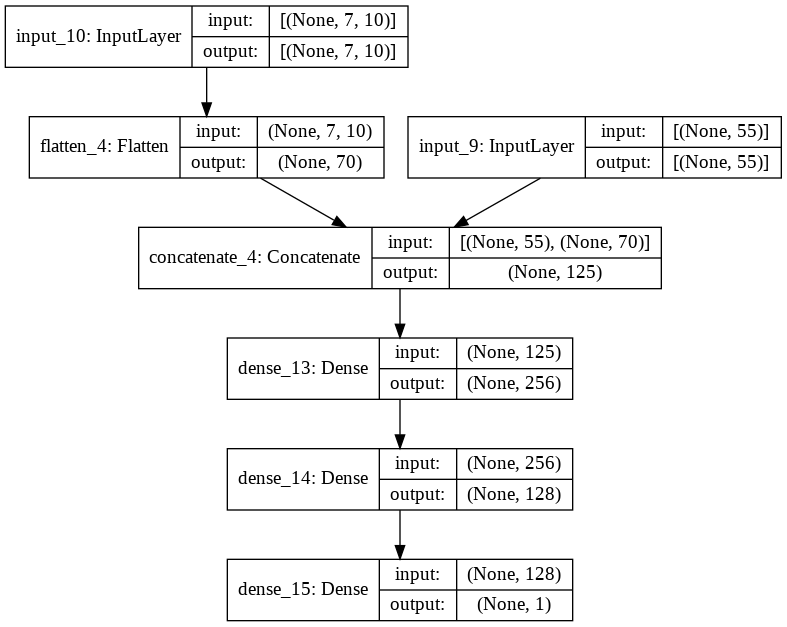

In [ ]:
plot_model(baselineModel, to_file='baselineModel.png', show_shapes=True)

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#callback for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-3, restore_best_weights=True)

#start the training
history = baselineModel.fit(
            x = [np.array(lagged_df_train['x'].to_numpy().tolist(),dtype=np.float32), lagged_df_train.iloc[:, 2:]],
            y = lagged_df_train.iloc[:, 1],
            epochs = 100,
            batch_size = 1,
            validation_data = ([np.array(lagged_df_val['x'].to_numpy().tolist(),dtype=np.float32), lagged_df_val.iloc[:, 2:]], lagged_df_val.iloc[:, 1]),
            callbacks=callback,
            verbose = 1)

Epoch 1/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.4455 - val_loss: 0.1783
Epoch 2/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.2019 - val_loss: 0.1894
Epoch 3/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1730 - val_loss: 0.1419
Epoch 4/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1543 - val_loss: 0.2000
Epoch 5/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1508 - val_loss: 0.1168
Epoch 6/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1440 - val_loss: 0.1157
Epoch 7/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1260 - val_loss: 0.1293
Epoch 8/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1240 - val_loss: 0.1274
Epoch 9/100
1264/1264 [==============================] - 3s 2ms/step - loss: 0.1152 - val_loss: 0.0913
Epoch 10/100
1264/1264 [==============================] - 3s 2ms/step - l

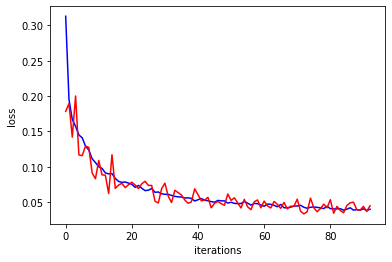

In [ ]:
plotLearningCurve()

In [ ]:
model1_MAE = baselineModel.evaluate(x = [np.array(lagged_df_test['x'].to_numpy().tolist(),dtype=np.float32), lagged_df_test.iloc[:, 2:]],
                       y = lagged_df_test.iloc[:, 1])
print('MAE for Simple Fully Connected Model: ', model1_MAE)

40/40 [==============================] - 0s 2ms/step - loss: 0.0333
MAE for Simple Fully Connected Model:  0.033332038670778275


## Note:

You can observe that the mean absolute error decreased way more from baseline model - 0.9 to 0.03 which is appreciative. Also, there is minute difference between validation loss and training loss which says that the model is not overfitting.

## Modified model - RNN

In [ ]:
# Metadata Input Layer
input2 = Input(shape=INPUT_DIM_2)
fc_layer1 = Dense(256, activation='relu')(input2)

# Temporal Input Layer
input1 = Input(shape=INPUT_DIM_1)
gru1 = GRU(64, dropout=0.1, recurrent_dropout=0.5, kernel_regularizer=regularizers.l2(0.001), recurrent_regularizer=regularizers.l2(0.001))(input1)

# Combine both outputs
concat1 = concatenate([fc_layer1, gru1], axis= 1)

# Output
fc_layer2 = Dense(128, activation='relu')(concat1)
dropout1 = Dropout(0.2)(fc_layer2)
output = Dense(1)(dropout1)

# Combine Model
modifiedModel = Model(inputs=[input1, input2], outputs=output)

# Optimizer definition
opt = Adam()

# Compiling the model
modifiedModel.compile(loss='mae', optimizer= opt)

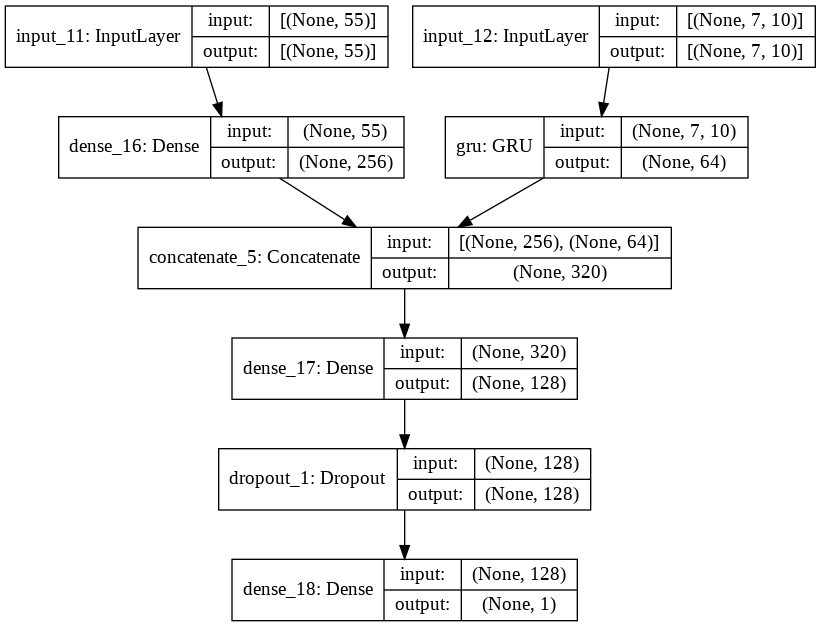

In [ ]:
plot_model(modifiedModel, to_file='baselineModel.png', show_shapes=True)

In [ ]:

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#callback for early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, min_delta=1e-3, restore_best_weights=True)

#start the training
history = modifiedModel.fit(
            x = [np.array(lagged_df_train['x'].to_numpy().tolist(),dtype=np.float32), lagged_df_train.iloc[:, 2:]],
            y = lagged_df_train.iloc[:, 1],
            epochs = 100,
            batch_size = 1,
            validation_data = ([np.array(lagged_df_val['x'].to_numpy().tolist(),dtype=np.float32), lagged_df_val.iloc[:, 2:]], lagged_df_val.iloc[:, 1]),
            callbacks=callback,
            verbose = 1)

Epoch 1/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.2039 - val_loss: 0.1244
Epoch 2/100
1264/1264 [==============================] - 10s 8ms/step - loss: 0.1987 - val_loss: 0.1484
Epoch 3/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.1963 - val_loss: 0.1300
Epoch 4/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.2022 - val_loss: 0.1426
Epoch 5/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.1911 - val_loss: 0.1778
Epoch 6/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.1905 - val_loss: 0.1223
Epoch 7/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.1965 - val_loss: 0.1205
Epoch 8/100
1264/1264 [==============================] - 9s 7ms/step - loss: 0.1872 - val_loss: 0.1093
Epoch 9/100
1264/1264 [==============================] - 9s 8ms/step - loss: 0.1958 - val_loss: 0.1451
Epoch 10/100
1264/1264 [==============================] - 10s 8ms/step -

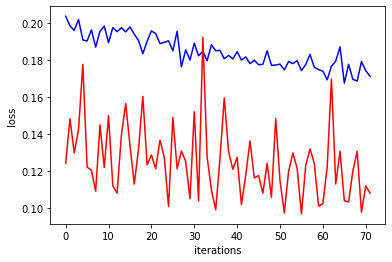

In [ ]:
plotLearningCurve()

In [ ]:
model2_MAE = modifiedModel.evaluate(x = [np.array(lagged_df_test['x'].to_numpy().tolist(),dtype=np.float32), lagged_df_test.iloc[:, 2:]],
                       y = lagged_df_test.iloc[:, 1])
print('MAE for Model with RNN: ', model2_MAE)

40/40 [==============================] - 0s 3ms/step - loss: 0.0975
MAE for Model with RNN:  0.09749439358711243


### Note:
MAE for RNN model is 0.09 which is more than fully connected model. Thus its evident that Fully Connected model works better for this dataset than RNN model.
